Python automation of map plotting

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # Silence some warnings

c:\Users\Airly\anaconda3\envs\geospatial\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Airly\AppData\Local\Temp\ipykernel_20320\3475797434.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. H

Resources
- https://gkhub.earthobservations.org/records/5wg96-bvv84?package=7yjze-2g558

In [2]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [3]:
gdf_countries = gpd.read_file(r'.\data\Islands_Europe.shp')
gdf_countries = gdf_countries.to_crs('ESRI:54030')
gdf_countries['area'] = gdf_countries.geometry.area
gdf_countries = gdf_countries.sort_values('area', ascending=False)
gdf_countries.head(3)

,OBJECTID_1,Name_USGSO,Plate,USGS_ISID,NEAR_FID,NEAR_DIST,ALL_Uniq,Linework_S,Meaning_AL,ID_GID,...,ChangeRef,Shape_Leng,IslandArea,IslandCoas,Area_Geode,Coast_Geod,Shape_Le_1,Shape_Area,geometry,area
7,2877,Sicily,Africa,318901,226128,0.0,273768,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,239499.0,...,NaN,1.191976e+06,25498.341449,1191.975839,25454.283083,1190.178528,1.191976e+06,2.549834e+10,"POLYGON ((1364610.770 4095619.343, 1364624.585...",2.438564e+10
6,2873,Sardinia,Eurasia,318897,225976,0.0,273764,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,239347.0,...,NaN,1.453380e+06,23826.572993,1453.379616,23799.014515,1451.665802,1.453380e+06,2.382657e+10,"POLYGON ((740614.637 4176073.394, 740545.434 4...",2.323869e+10
8,2904,Cyprus,Anatolia,318928,227074,0.0,273795,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,240763.0,...,NaN,7.537467e+05,9283.519703,753.746689,9262.226924,757.314325,7.537467e+05,9.283520e+09,"POLYGON ((3071979.179 3817772.410, 3071982.627...",8.706992e+09


In [ ]:
# Zdefiniowanie nowoczesnej czcionki
nowoczesna_czcionka = {'family': 'Arial', 'weight': 'normal', 'size': 8}

(2823626.135114513, 3121548.1962799258, 3650891.547767011, 3863416.7744610156)

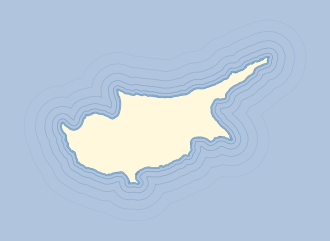

In [20]:
fig, ax = plt.subplots(figsize=(4,4))

gdf_cntr = gdf_countries[gdf_countries.Name_USGSO==list_islands[2]]
gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)
alpha = 0.8
range_num = 7

for buf_num in range(0, range_num):
    alpha = alpha - 0.1
    gdf_cntr.geometry.buffer(buf_num ** 2 * 1000).boundary.plot(ax=ax, alpha=alpha, 
                                                    color='steelblue', linewidth=0.5)
    
ax.axis('off')

In [21]:
list_islands = gdf_countries.Name_USGSO.unique()[0:24]
list_islands

array(['Sicily', 'Sardinia', 'Cyprus', 'Corsica', 'Crete', 'Euboea',
       'Majorca', 'Tenerife', 'Lesbos', 'Danube Delta', 'Fuerteventura',
       'Gran Canaria', 'Rhodes', 'UNNAMED', 'Khios', 'Cephalonia',
       'Lanzarote', 'Sao Miguel', 'Madeira', 'Menorca', 'La Palma',
       'Corfu', 'Ibiza', 'Cress'], dtype=object)

In [22]:
plt.rcParams['figure.facecolor'] = 'lightsteelblue'
fig, axs = plt.subplots(int(len(list_islands)/4), 4, figsize=(12,(len(list_islands)/4)*2))
#   gridspec_kw={'hspace': 0.5})

axs = axs.flatten()


for i in range(0, len(list_islands)):
    try:
        gdf_cntr = gdf_countries[gdf_countries.Name_USGSO==list_islands[i]]
        ax = axs[i]
        range_num = 7

        alpha = 0.8
        for buf_num in range(0, range_num):
            alpha = alpha - 0.1
            gdf_cntr.geometry.buffer(buf_num ** 2 * 1000).boundary.plot(ax=ax, alpha=alpha, 
                                                                    color='steelblue', linewidth=0.5)

        if i <1:
            bounds = gdf_cntr.geometry.buffer(50_000).bounds
            cntr_width = bounds.maxx - bounds.minx
            cntr_hight = bounds.maxy - bounds.miny
        
        gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)
        
        ax.axis('off')
        ax.set_title(list_islands[i], fontdict=nowoczesna_czcionka)
        ax.set_xlim(int(gdf_cntr.centroid.x) - int(cntr_width)/2, int(gdf_cntr.centroid.x) \
            + int(cntr_width)/2)
        ax.set_ylim(int(gdf_cntr.centroid.y) - int(cntr_hight)/2, int(gdf_cntr.centroid.y) \
            + int(cntr_hight)/2)
    except:
        pass

# plt.tight_layout()

In [7]:
# bufory - show on a singular
    # alpha = 0.8
    # for buf_num in range(0, range_num):
    #     alpha = alpha - 0.1
    #     gdf_cntr.geometry.buffer(buf_num ** 2 * 1000).boundary.plot(ax=ax, alpha=alpha, 
    #                                                             color='steelblue', linewidth=0.5)

In [8]:
# # test kolorow
# plt.rcParams['figure.facecolor'] = 'lightsteelblue'
# # brudnopis - budory i inne
# gdf_cntr = gdf_countries[gdf_countries.Name_USGSO=='Cyprus']

# # test pojedyncza mapka
# fig, ax = plt.subplots(figsize=(3,3))

# range_num = 8
# alpha=0.8
# for buf_num in range(0, range_num):
#     alpha = alpha - 0.1
#     gdf_cntr.geometry.buffer(buf_num ** 2 * 1000).boundary.plot(ax=ax, alpha=alpha, 
#                                                                     color='steelblue', linewidth=0.5)

# if i <1:
#     print(country)
#     bounds = gdf_cntr.geometry.buffer(36_000).bounds
#     cntr_hight = bounds.maxx - bounds.minx


# gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)

# ax.axis('off')
# # ax.set_title(country)
# # ax.set_xlim(int(gdf_cntr.centroid.x) - int(cntr_hight)/2, int(gdf_cntr.centroid.x) + int(cntr_hight)/2)